In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from unidecode import unidecode
sns.set_style("darkgrid")
sns.set_context("notebook")

In [2]:
fotocasa = pd.read_csv("fotocasa_cleaned.csv")

In [3]:
fotocasa.head()

,Air_Conditioner,Antiquity,Bathrooms,Borough,Community_Zone,Concierge,District,Elevator,Emissions,Energy_Consumption,...,Equipped_Kitchen,Floor,Furnished,Garden,Price,Rooms,Size,Swimming_Pool,Terrace,Type
0,1,70-100,1,Ibiza,0,1,Retiro,1,G,G,...,1,1,1,0,850,2,49,0,0,Piso
1,1,+100,3,Almagro,0,0,Chamberí,1,G,G,...,1,3,0,0,2850,3,155,0,1,Piso
2,1,10-20,2,Valdefuentes,1,1,Hortaleza,1,G,G,...,1,6,0,0,1250,2,101,1,1,Ático
3,0,10-20,2,Valdefuentes,1,1,Hortaleza,1,D,D,...,1,3,0,0,1015,2,93,1,0,Piso
4,1,1-5,2,Universidad,1,1,Centro,1,B,C,...,1,6,0,0,1900,1,82,1,0,Apartamento


In [4]:
fotocasa.describe()

,Air_Conditioner,Bathrooms,Community_Zone,Concierge,Elevator,Ensuite,Equipped_Kitchen,Furnished,Garden,Price,Rooms,Size,Swimming_Pool,Terrace
count,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000
mean,0.630444,1.490621,0.165804,0.324709,0.728223,0.173243,0.856619,0.456016,0.054226,1428.662786,2.031910,86.492777,0.149202,0.228870
std,0.482711,0.845995,0.371925,0.468291,0.444899,0.378477,0.350480,0.498088,0.226475,5543.401820,1.091924,71.258458,0.356307,0.420128
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,780.000000,1.000000,50.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,990.000000,2.000000,70.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1425.000000,3.000000,100.000000,0.000000,0.000000
max,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,420000.000000,10.000000,2190.000000,1.000000,1.000000


In [5]:
fotocasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9276 entries, 0 to 9275
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Air_Conditioner     9276 non-null   int64 
 1   Antiquity           9276 non-null   object
 2   Bathrooms           9276 non-null   int64 
 3   Borough             9276 non-null   object
 4   Community_Zone      9276 non-null   int64 
 5   Concierge           9276 non-null   int64 
 6   District            9276 non-null   object
 7   Elevator            9276 non-null   int64 
 8   Emissions           9276 non-null   object
 9   Energy_Consumption  9276 non-null   object
 10  Ensuite             9276 non-null   int64 
 11  Equipped_Kitchen    9276 non-null   int64 
 12  Floor               9276 non-null   object
 13  Furnished           9276 non-null   int64 
 14  Garden              9276 non-null   int64 
 15  Price               9276 non-null   int64 
 16  Rooms               9276

In [6]:
num_cols = ["Air_Conditioner", "Bathrooms", "Community_Zone", "Concierge", "Elevator",
            "Ensuite", "Equipped_Kitchen", "Furnished", "Garden", "Rooms", "Size", 
            "Swimming_Pool", "Terrace", "Price"]
cat_cols = ["Antiquity", "Borough", "District", "Emissions", "Energy_Consumption","Floor","Type"]

(5.0, 8.9)

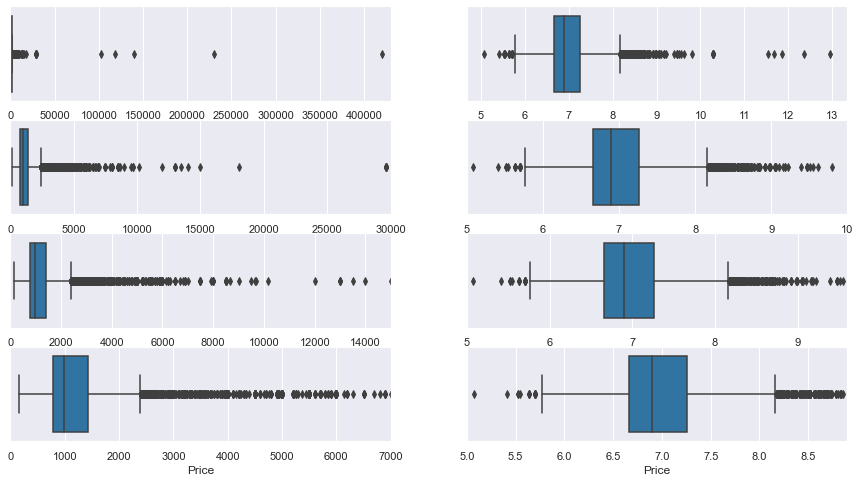

In [7]:
f, ax = plt.subplots(nrows = 4, ncols=2, figsize = (15,8))
sns.boxplot(fotocasa["Price"], ax = ax[0][0])
sns.boxplot(np.log(fotocasa["Price"]), ax = ax[0][1])
ax[0][0].set_xlim([0,430000])
sns.boxplot(fotocasa["Price"], ax = ax[1][0])
sns.boxplot(np.log(fotocasa["Price"]), ax = ax[1][1])
ax[1][0].set_xlim([0,30000])
ax[1][1].set_xlim([5,10])
sns.boxplot(fotocasa["Price"], ax = ax[2][0])
sns.boxplot(np.log(fotocasa["Price"]), ax = ax[2][1])
ax[2][0].set_xlim([0,15000])
ax[2][1].set_xlim([5,9.6])
sns.boxplot(fotocasa["Price"], ax = ax[3][0])
sns.boxplot(np.log(fotocasa["Price"]), ax = ax[3][1])
ax[3][0].set_xlim([0,7000])
ax[3][1].set_xlim([5,8.9])

In [8]:
outliers = (np.log(fotocasa["Price"])>9) | (np.log(fotocasa["Price"])<5.5)
print("There are ", outliers.sum(), "outliers, ", outliers.sum()/len(fotocasa)*100, "% of the data")
min_ = fotocasa.loc[~outliers, "Price"].min()
max_ = fotocasa.loc[~outliers, "Price"].max()
print("Price values from ", min_, " to ", max_, "€")

There are  35 outliers,  0.3773178094006037 % of the data
Price values from  250  to  8000 €


In [9]:
def isoutlier(data):
    (q1, q3)=data.quantile([0.25,0.75])
    iqr = q3 - q1
    maxwhis = q3 + 1.5 * iqr
    minwhis = q1 - 1.5 * iqr
    return (data>=maxwhis) | (data<=minwhis)

In [10]:
outliers1 = isoutlier(fotocasa["Price"])
print("There are ", outliers1.sum(), "outliers, ", outliers1.sum()/len(fotocasa)*100, "% of the data")
min1 = fotocasa.loc[~outliers1, "Price"].min()
max1 = fotocasa.loc[~outliers1, "Price"].max()
print("Price values from ", min1, " to ", max1, "€")

There are  844 outliers,  9.098749460974558 % of the data
Price values from  160  to  2390 €


In [11]:
outliers2 = isoutlier(np.log(fotocasa["Price"]))
print("There are ", outliers2.sum(), "outliers, ", outliers2.sum()/len(fotocasa)*100, "% of the data")
min2 = fotocasa.loc[~outliers2, "Price"].min()
max2 = fotocasa.loc[~outliers2, "Price"].max()
print("Price values from ", min2, " to ", max2, "€")

There are  313 outliers,  3.3742992669253993 % of the data
Price values from  320  to  3500 €


In [12]:
outliers3 = isoutlier(np.sqrt(fotocasa["Price"]))
print("There are ", outliers3.sum(), "outliers, ", outliers3.sum()/len(fotocasa)*100, "% of the data")
min3 = fotocasa.loc[~outliers3, "Price"].min()
max3 = fotocasa.loc[~outliers3, "Price"].max()
print("Price values from ", min3, " to ", max3, "€")

There are  600 outliers,  6.468305304010349 % of the data
Price values from  225  to  2750 €


In [13]:
outliers4 = (fotocasa["Price"]<=fotocasa["Price"].quantile(0.025)) | \
            (fotocasa["Price"]>=fotocasa["Price"].quantile(0.975))
print("There are ", outliers4.sum(), "outliers, ", outliers4.sum()/len(fotocasa)*100, "% of the data")
min4 = fotocasa.loc[~outliers4, "Price"].min()
max4 = fotocasa.loc[~outliers4, "Price"].max()
print("Price values from ", min4, " to ", max4, "€")

There are  471 outliers,  5.077619663648124 % of the data
Price values from  558  to  3950 €


The aim is to help a wide range of people, very expensive rents are unusual. That is why the criteria will be keeping 95% of the prices with the 95% confidence interval. 

In [14]:
fotocasa_eda = fotocasa[~outliers4]

In [15]:
fotocasa_eda.columns

Index(['Air_Conditioner', 'Antiquity', 'Bathrooms', 'Borough',
       'Community_Zone', 'Concierge', 'District', 'Elevator', 'Emissions',
       'Energy_Consumption', 'Ensuite', 'Equipped_Kitchen', 'Floor',
       'Furnished', 'Garden', 'Price', 'Rooms', 'Size', 'Swimming_Pool',
       'Terrace', 'Type'],
      dtype='object')

# Price

Text(0.5, 1.0, 'log Price distribution')

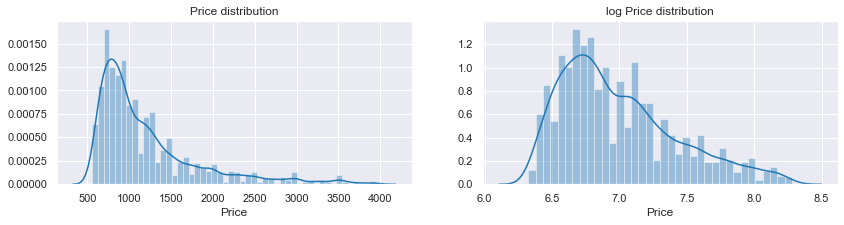

In [16]:
f, ax = plt.subplots(ncols = 2, figsize = (14,3))
sns.distplot(fotocasa_eda["Price"], ax = ax[0])
ax[0].set_title("Price distribution")
sns.distplot(np.log(fotocasa_eda["Price"]), ax = ax[1])
ax[1].set_title("log Price distribution")

# Correlation

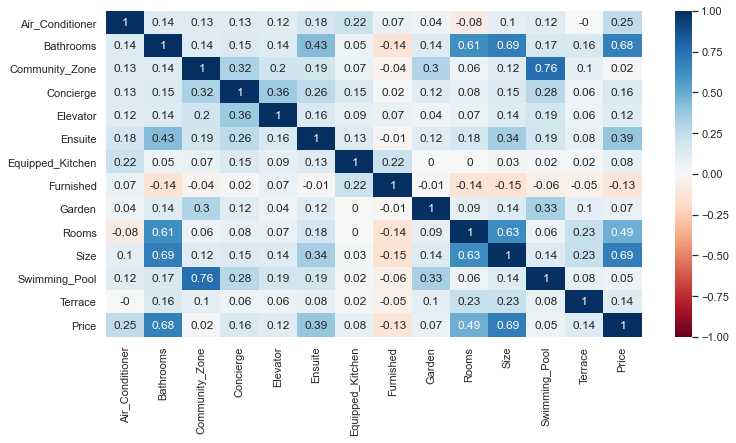

In [17]:
f, ax = plt.subplots(figsize = (12,6))
sns.heatmap(fotocasa_eda[num_cols].corr().round(2), vmin = -1, vmax = 1, cmap = "RdBu", 
            annot = True, ax = ax)

Logically, number of bathrooms and rooms and price are highly correlated with price:

(0.0, 7.5)

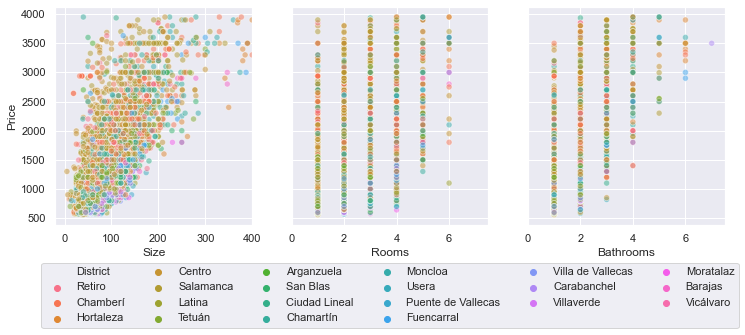

In [18]:
f, ax = plt.subplots(figsize = (12,4), ncols = 3, sharey = True)
sns.scatterplot(x = fotocasa_eda["Size"], y = fotocasa_eda["Price"], ax = ax[0], 
                hue = fotocasa_eda["District"], alpha = 0.5)
sns.scatterplot(x = fotocasa_eda["Rooms"], y = fotocasa_eda["Price"], ax = ax[1], 
                hue = fotocasa_eda["District"], alpha = 0.5)
sns.scatterplot(x = fotocasa_eda["Bathrooms"], y = fotocasa_eda["Price"], ax = ax[2], 
                hue = fotocasa_eda["District"], alpha = 0.5)
ax[0].get_legend().remove()
ax[0].set_xlim([-20,400])
ax[1].get_legend().remove()
ax[1].set_xlim([0,7.5])
ax[2].legend(loc="lower center", bbox_to_anchor=(-0.7, -0.5), ncol = 6)
ax[2].set_xlim([0,7.5])

# District and borough

In [19]:
district_map = gpd.read_file("District/DISTRITOS.shp")

In [20]:
district_map["NOMBRE"] = district_map["NOMBRE"].apply(lambda x: x.split(" - ")[0])

In [21]:
mean_district_values = pd.pivot_table(fotocasa_eda, values = "Price", index = "District")
count_district_values = fotocasa_eda.District.value_counts()
data_district = mean_district_values.join(count_district_values)

In [22]:
merged_district = district_map.set_index("NOMBRE").join(data_district).reset_index()

In [23]:
merged_district["coords"] = merged_district["geometry"].apply(lambda x: x.representative_point().coords[0])

Text(0.5, 1.0, 'Number of properties to rent')

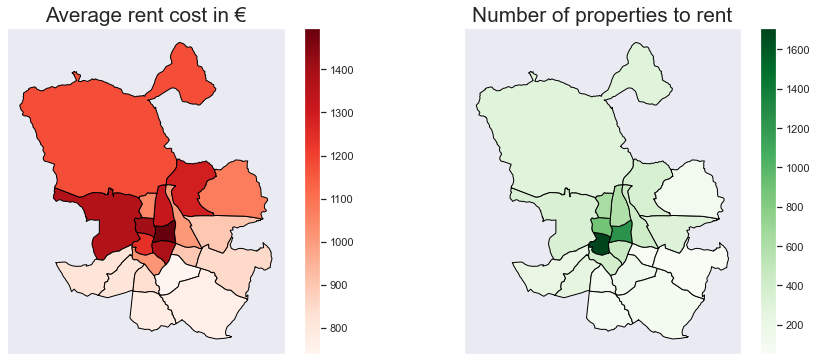

In [24]:
f, ax = plt.subplots(figsize = (15,6), ncols = 2)
merged_district.plot(ax = ax[0], column = "Price", cmap = "Reds", edgecolor = "black", legend = True)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("Average rent cost in €", fontsize = "xx-large")
merged_district.plot(ax = ax[1], column = "District", cmap = "Greens", edgecolor = "black", legend = True)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Number of properties to rent", fontsize = "xx-large")

In [25]:
borough_map = gpd.read_file("Boroughs/BARRIOS.shp")

In [26]:
borough_map["NOMBRE"] = borough_map["NOMBRE"].apply(lambda x: unidecode(x).split(",")[0].lower())

In [27]:
mean_borough_values = pd.pivot_table(fotocasa_eda, values = "Price", index = "Borough").reset_index()
mean_borough_values["Borough"] = mean_borough_values["Borough"] \
    .apply(lambda x: unidecode(x).split(",")[0].lower())
mean_borough_values = mean_borough_values.set_index("Borough")

In [28]:
count_borough_values = fotocasa_eda.Borough.value_counts().reset_index()
count_borough_values["index"] = count_borough_values["index"].apply(lambda x: unidecode(x).lower())
count_borough_values = count_borough_values.set_index("index")

In [29]:
data_borough = count_borough_values.join(mean_borough_values)

In [30]:
merged_borough = borough_map.set_index("NOMBRE").join(data_borough, how = "outer").reset_index()

In [31]:
merged_borough[merged_borough["Price"].isna()]

,index,OBJECTID,geodb_oid,CODDIS,NOMDIS,CODBAR,CODDISTRIT,CODBARRIO,ORIG_FID,geometry,Borough,Price
17,atocha,13,13,02,Arganzuela,027,02,2-7,12,"POLYGON ((441548.282 4473108.667, 441569.612 4...",NaN,NaN
119,valdebernardo,0,0,19,Vicálvaro,192,19,19-2,0,"POLYGON ((448517.740 4472307.209, 448505.626 4...",NaN,NaN


In Fotocasa, the borough of Valderrivas is included in the borough of Valdebernardo and the borough of Atocha in the borough of Delicias. Consider that when building the pipeline. 

In [32]:
merged_borough.loc[merged_borough["index"]=="valdebernardo","Borough"] = \
        data_borough.loc["valderrivas","Borough"]
merged_borough.loc[merged_borough["index"]=="valdebernardo","Price"] = \
        data_borough.loc["valderrivas","Price"]

In [33]:
merged_borough.loc[merged_borough["index"]=="atocha","Borough"] = \
        data_borough.loc["delicias","Borough"]
merged_borough.loc[merged_borough["index"]=="atocha","Price"] = \
        data_borough.loc["delicias","Price"]

Text(0.5, 1.0, 'Number of properties to rent')

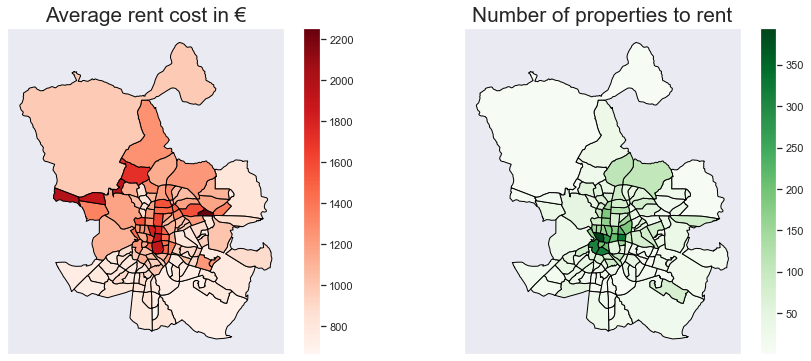

In [34]:
f, ax = plt.subplots(figsize = (15,6), ncols = 2)
merged_borough.plot(column = "Price", cmap = "Reds", edgecolor = "black", legend = True, ax = ax[0])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("Average rent cost in €", fontsize = "xx-large")
merged_borough.plot(column = "Borough", cmap = "Greens", edgecolor = "black", legend = True, ax = ax[1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Number of properties to rent", fontsize = "xx-large")

In [35]:
fotocasa_eda["Borough"].value_counts().min()

1

In [36]:
fotocasa_eda["District"].value_counts().min()

52

# Antiquity

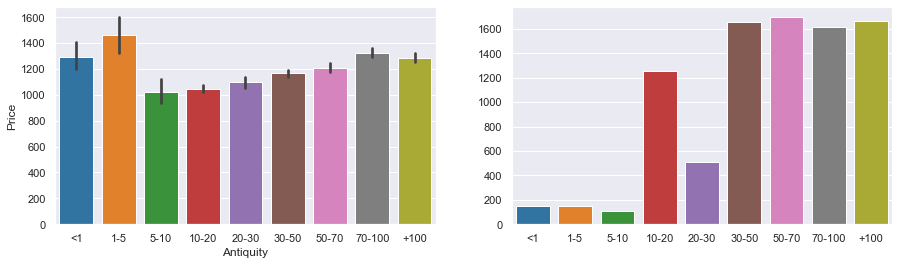

In [37]:
f, ax = plt.subplots(ncols = 2, figsize = (15,4))
sns.barplot(x = fotocasa_eda["Antiquity"], y = fotocasa_eda["Price"],
           order = ["<1","1-5","5-10","10-20","20-30","30-50","50-70","70-100","+100"], ax = ax[0])
sns.barplot(x = fotocasa_eda["Antiquity"].value_counts().index, 
            y = fotocasa_eda["Antiquity"].value_counts().values,
           order = ["<1","1-5","5-10","10-20","20-30","30-50","50-70","70-100","+100"], ax = ax[1])

# Energy consumption and Emissions

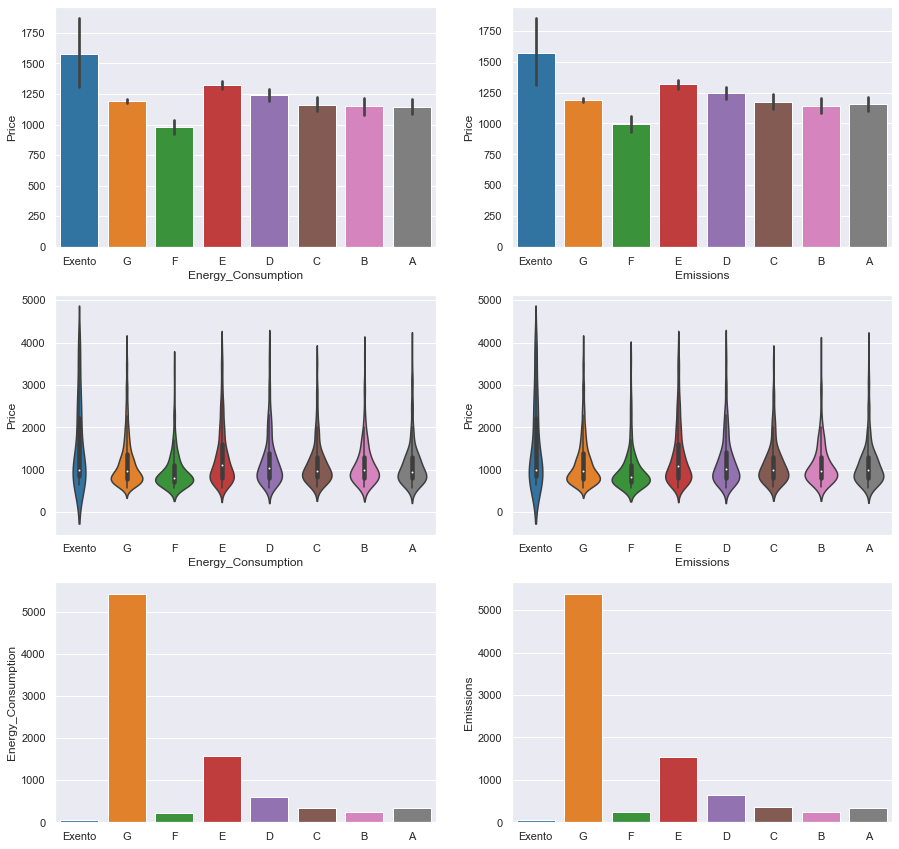

In [38]:
f, ax = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
sns.barplot(x = fotocasa_eda["Energy_Consumption"], y = fotocasa_eda["Price"],
            order = ["Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[0][0])
sns.barplot(x = fotocasa_eda["Emissions"], y = fotocasa_eda["Price"],
            order = ["Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[0][1])
sns.violinplot(x = fotocasa_eda["Energy_Consumption"], y = fotocasa_eda["Price"],
            order = ["Exento","G", "F", "E", "D", "C","B", "A"], ax=ax[1][0])
sns.violinplot(x = fotocasa_eda["Emissions"], y = fotocasa_eda["Price"],
            order = ["Exento","G", "F", "E", "D", "C","B", "A"], ax=ax[1][1])
sns.barplot(x = fotocasa_eda["Energy_Consumption"].value_counts().index, 
            y = fotocasa_eda["Energy_Consumption"].value_counts().reset_index()["Energy_Consumption"],
            order = ["Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[2][0])
sns.barplot(x = fotocasa_eda["Emissions"].value_counts().index, 
            y = fotocasa_eda["Emissions"].value_counts().reset_index()["Emissions"],
            order = ["Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[2][1])

In [39]:
(fotocasa_eda["Emissions"]==fotocasa_eda["Energy_Consumption"]).sum()/len(fotocasa_eda)*100

94.46905167518456

More or less the same info. We just need one:

In [40]:
fotocasa_eda = fotocasa_eda.drop("Emissions", axis = 1)

# Floor

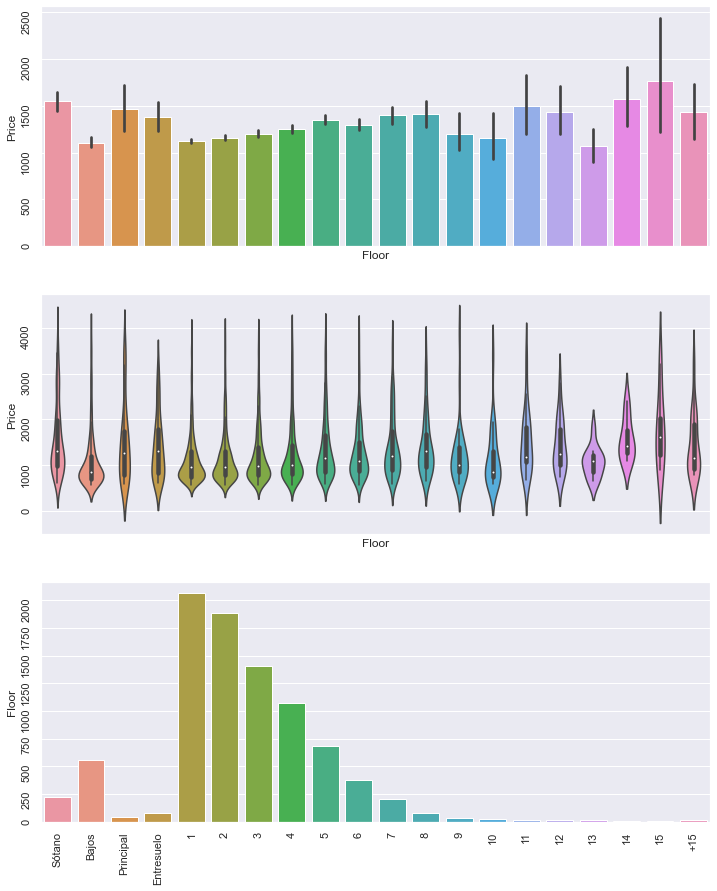

In [41]:
f, ax = plt.subplots(nrows=3, figsize=(12,15), sharex = True)
sns.barplot(x = fotocasa_eda["Floor"], y = fotocasa_eda["Price"], ax=ax[0], 
            order = ["Sótano","Bajos","Principal","Entresuelo","1","2","3","4","5","6","7","8","9","10",
             "11","12","13","14","15","+15"])
sns.violinplot(x = fotocasa_eda["Floor"], y = fotocasa_eda["Price"], ax=ax[1],
            order = ["Sótano","Bajos","Principal","Entresuelo","1","2","3","4","5","6","7","8","9","10",
             "11","12","13","14","15","+15"])
sns.barplot(x = fotocasa_eda["Floor"].value_counts().index, 
            y = fotocasa_eda["Floor"].value_counts().reset_index()["Floor"], ax=ax[2],
            order = ["Sótano","Bajos","Principal","Entresuelo","1","2","3","4","5","6","7","8","9","10",
             "11","12","13","14","15","+15"])
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)
ax[2].tick_params(labelrotation=90)

In [42]:
fotocasa_eda["Floor"].value_counts()

1             2063
2             1887
3             1408
4             1071
5              681
Bajos          558
6              373
Sótano         221
7              205
8               79
Entresuelo      75
Principal       44
9               37
10              25
12              18
11              18
+15             17
13              11
14               8
15               6
Name: Floor, dtype: int64

# Type

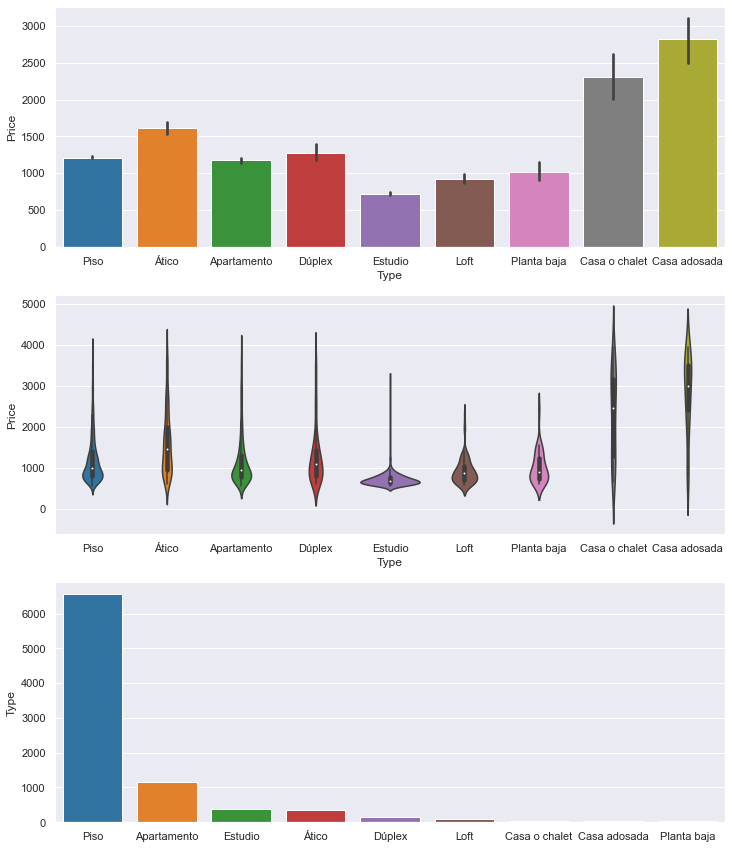

In [43]:
f, ax = plt.subplots(nrows=3, figsize=(12,15))
sns.barplot(x = fotocasa_eda["Type"], y = fotocasa_eda["Price"], ax=ax[0])
sns.violinplot(x = fotocasa_eda["Type"], y = fotocasa_eda["Price"], ax=ax[1])
sns.barplot(x = fotocasa_eda["Type"].value_counts().index, 
            y = fotocasa_eda["Type"].value_counts().reset_index()["Type"], ax=ax[2])

In [44]:
fotocasa_eda["Type"].value_counts()

Piso             6568
Apartamento      1147
Estudio           387
Ático             352
Dúplex            155
Loft               88
Casa o chalet      38
Casa adosada       35
Planta baja        35
Name: Type, dtype: int64

In [45]:
fotocasa_eda.to_csv("fotocasa_eda.csv", index=False)